# [Titanic Project](https://www.kaggle.com/c/titanic)
## This work is based on this [tutorial](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide#) 

Team: **Maria Curie Skłodowska**

Kaggle (team): **Maria Curie Skłodowska**

Kaggle: **guillaumethomas** **arondavis

[Github Repo](https://github.com/guillaumethomas/kaggle_titanic)

In [2]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sns.set()


## Loading Dataframe

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Info about the Dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are 12 fields in the dataset and 891 passengers

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are 11 fields un the the dataset and 418 passengers.
the field survived is missing and our success will be dertermined by submitting our results to Kaggle

In [6]:
print('Train dataset shape {}\n'.format(train.shape))
print('Test dataset shape {}'.format(test.shape))


Train dataset shape (891, 12)

Test dataset shape (418, 11)


Test sampe size is approximately half the size of the train sample

## Data Sample:

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lefebre, Miss. Ida",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Angheloff, Mr. Minko",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Missing data comment's

- There is no missing data in the test sample 
- Most of the missing data in the train set is related to age and to the cabin location or where people have embarked.
- The size of the missing data in cabin location for both set make looking at this field irrelevant 

## Data Exploration 

In this part of the document, we are exploring the data:
- looking at survival rate per class

### How many passengers have survived in the train data?

In [15]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]
total = len(survived) + len(not_survived)

survived_l = [len(survived), round(len(survived) * 100 / total, 2)]
not_survived_l = [len(not_survived), round(len(not_survived) * 100 / total, 2)]

print("In train sample:\nThere are {} passengers".format(total))
print("{} or {}% have survived".format(*survived_l))
print("{} or {}% have not_survived".format(*not_survived_l))



In train sample:
There are 891 passengers
342 or 38.38% have survived
549 or 61.62% have not_survived


### Passengers per class:

In [16]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Hytpothesis is this will be an important feature to determine location on the ship AND priorty for lifeboats**
Please note that most of the passengers are in the lowest class 

In [17]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The rate of survival is almost 3 times better if you were member of the first class
- 69,3 % survival rate in the first class
- 47.3% in the second class 
- only 24.23% in the third class

**Survival rates confirm our hypothesis will keep as a key feature**

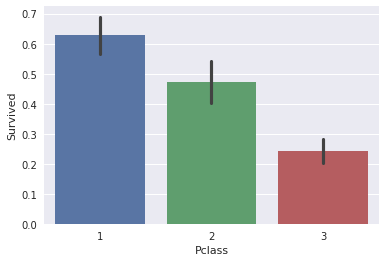

In [19]:
sns.barplot(x='Pclass', y='Survived', data=train)

### Fare

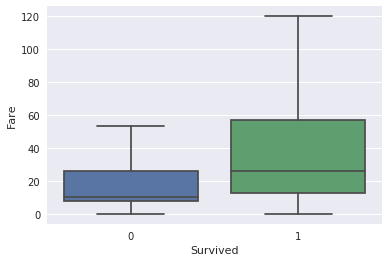

In [20]:
sns.boxplot(x='Survived', y='Fare', data=train, showfliers=False)

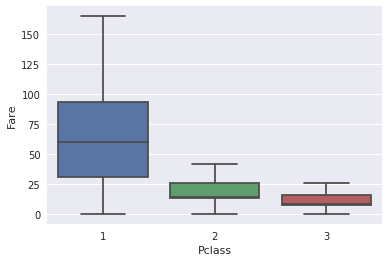

In [21]:
sns.boxplot(x='Pclass', y='Fare', data=train, showfliers=False)

Not surprisingly, the higher the class the higher average fare (as on the above graph). As in the 1st class there was higher survival rate than in the 2nd, and there was higher survival rate in 2nd class than in the 3rd, the average fare paid by those who survived is higher then the average fare paid by those who didn't (as visible on the Fare vs Survived graph). Since, fare can be a good predictor for survival.

### Sex

In [22]:
a = train.Sex.value_counts()
print(a)

per_m = round(a.values[0] * 100 / sum(a.values), 2)
per_f = round(a.values[1] * 100 / sum(a.values), 2)

print('\nThe percentage of male passengers is {}% and {}% for female\n'.format(per_m, per_f))

a = test.Sex.value_counts()
print(a)

per_m = round(a.values[0] * 100 / sum(a.values), 2)
per_f = round(a.values[1] * 100 / sum(a.values), 2)

print('\nThe percentage of male passengers is {}% and {}% for female\n'.format(per_m, per_f))


male      577
female    314
Name: Sex, dtype: int64

The percentage of male passengers is 64.76% and 35.24% for female

male      266
female    152
Name: Sex, dtype: int64

The percentage of male passengers is 63.64% and 36.36% for female



**Please note that the percentage of Male and Female is very similar test and train sample**

In [23]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [24]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
a = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
d = {}
d[a.values[0][0]] = a.values[0][1]
d[a.values[1][0]] = a.values[1][1]
ratio = round(d['female'] / d['male'], 2)
print(ratio)



3.93


The rate of survival for female **3.93 time bigger** than is it for male
This feature will be important in our model

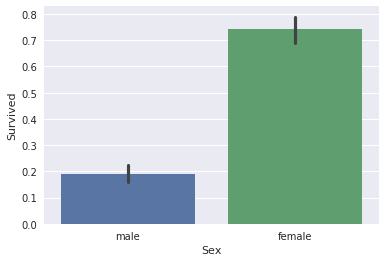

In [26]:
sns.barplot(x='Sex', y='Survived', data=train)

### Sex repartition per class 

Text(0,0.5,'Percentage')

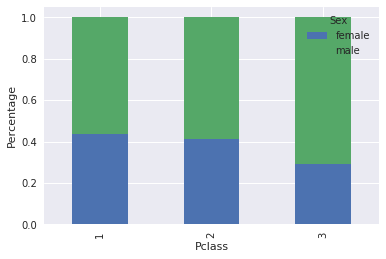

In [27]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [28]:
tab = pd.crosstab(train['Pclass'], train['Sex'])


total = {}
per_m = {}
per_f = {}
for i, (f, m) in enumerate(zip(tab.female, tab.male),1):
    total[i] = f + m
    per_m[i] = round((m / total[i]), 4) * 100
    per_f[i] = round((f / total[i]), 4) * 100


tot = pd.Series(total, name='total')
per_m = pd.Series(per_m, name='Male %')
per_f = pd.Series(per_f, name='Female %')


tab = pd.concat([tab, tot, per_m, per_f], axis=1)

print(tab)


        female  male  total  Male %  Female %
Pclass                                       
1           94   122    216   56.48     43.52
2           76   108    184   58.70     41.30
3          144   347    491   70.67     29.33


The percentage of womens in class 1 & 2 is similar but there is an over represenation of womens in the third class

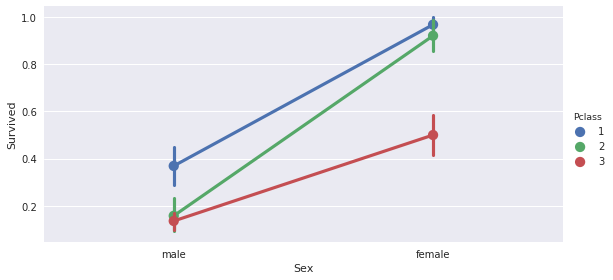

In [29]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

### Embarked

Review Embarked feature: Where passenger boarded ship? 
 - S = Southhampton England
 - C = Cherbourg, France
 - Q = Queenstown / Cobh, Ireland

**Hypothesis:** 
Was thinking perhaps port would matter based on ability to swim and or class? 
Looked at median income, house value and distance from water but they are ports so all on the water. 
Highest income area was Cherbourg, France

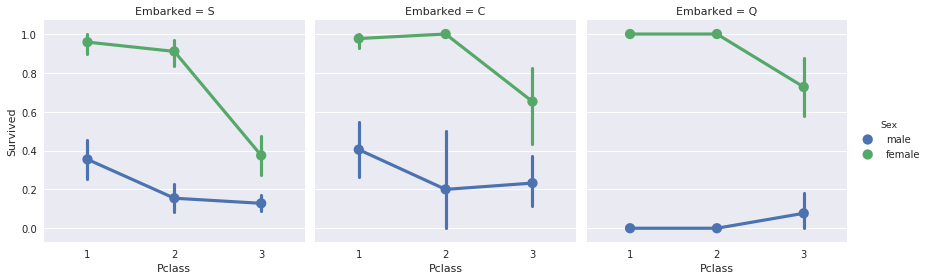

In [30]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

### Embarked vs. survival

In [31]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [33]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


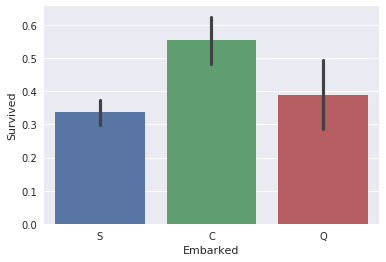

In [34]:
sns.barplot(x='Embarked', y='Survived', data=train)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


Text(0,0.5,'Percentage')

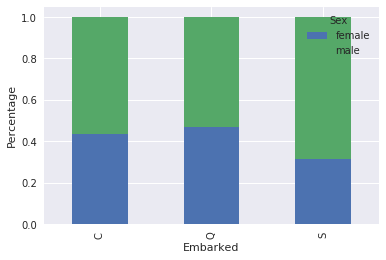

In [35]:
tab = pd.crosstab(train['Embarked'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentage')

In [36]:
train[['Embarked','Pclass','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Pclass,Survived
0,C,1.886905,0.553571
1,Q,2.909091,0.389610
2,S,2.350932,0.336957


Highest Pclass embarking from C

Conculsion: not a key feature as it is a lagging indicator for class and not as precise

### Parent child vs survival

Review Parch feature - Number of Parents/Children aboard

**Hypothesis:** 
More parents / children with the person the more likely to be saved. Culture + abilyt to lobby for the passenger


In [37]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [39]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


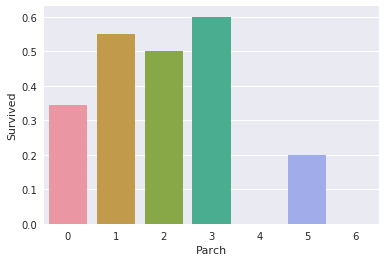

In [40]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

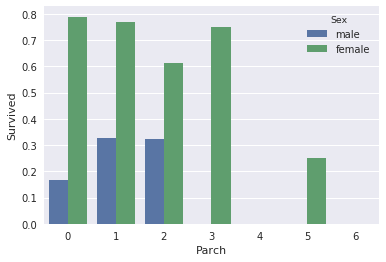

In [41]:
sns.barplot(x='Parch', y='Survived', hue="Sex", ci=None, data=train) # ci=None will hide the error bar

We could see that when you have siblings aboard the titanic and if this category is statiscally significant, you chance of survival is higher

### Siblings

In [42]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [44]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


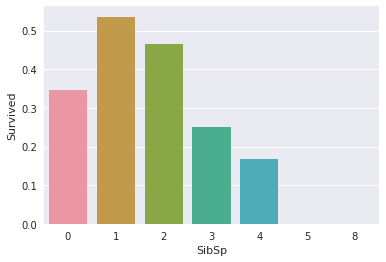

In [45]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

### Cabin Features:

Please as noted earlier this is the field with the biggest number of missing data

In [46]:
print('There is {} Null values'.format(train.Cabin.isnull().sum()))

There is 687 Null values


In [47]:
print(train.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


### Age vs. Survival

Hypothesis is that younger age will result in higher likelihood of survival especially when paired with Sex and looking at in bands for prediction vs specific age of each passenger.

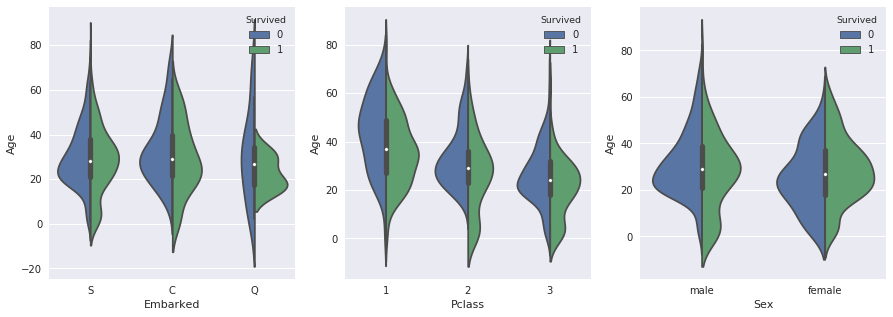

In [48]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site

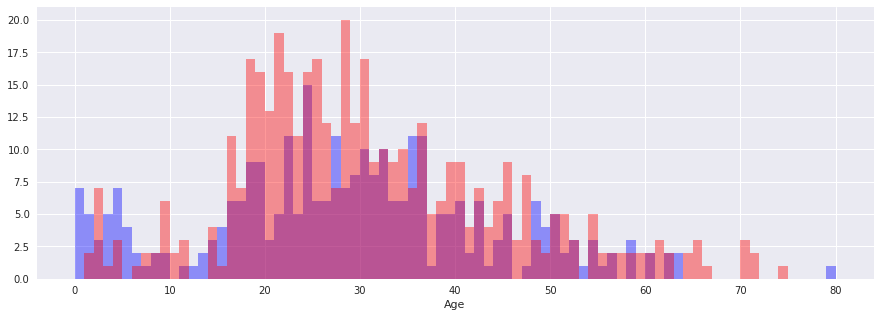

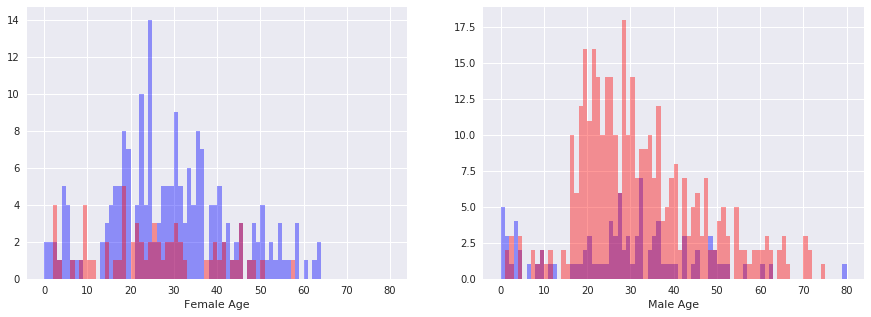

In [49]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

## Ploting Heatmap

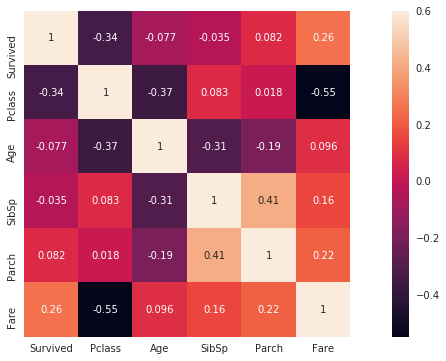

In [50]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

## Generating Features

In order to stay consistance, we will generate feature at the same time on both the test and the train sets.

This document merges the number of various feature explorations. To simplify, all of the features are stored in a train_test_data. However, there might be column with different versions of the same feature, that should not be used in the same model. For example, "Title_v1" and "Title_v2" are different feature created from the same base feature - "Title".

In [51]:
train_test_data = [train.copy(), test.copy()] # combining train and test dataset
dataset_name = ['train', 'test']

In [52]:
# Generating a new feature => Title
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    

In [53]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Title

In [54]:
pd.crosstab(train_test_data[0]['Title'], train_test_data[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [55]:
pd.crosstab(train_test_data[0]['Title'], train_test_data[0]['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
Title,,,,,,,,,,,,,,,,,,,,,
Capt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Col,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Countess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Don,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jonkheer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lady,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Major,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Master,1,1,0,2,1,5,4,4,5,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train_test_data[0].groupby('Title').Survived.value_counts()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            17
Miss      1           127
          0            55
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [57]:
train_test_data[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [58]:


for dataset in train_test_data:
    dataset['Title_v1'] = dataset['Title'].copy()
    dataset['Title_v1'] = dataset['Title_v1'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title_v1'] = dataset['Title_v1'].replace('Mlle', 'Miss')
    dataset['Title_v1'] = dataset['Title_v1'].replace('Ms', 'Miss')
    dataset['Title_v1'] = dataset['Title_v1'].replace('Mme', 'Mrs')
        

for dataset in train_test_data:
    dataset['Title_v2'] = dataset['Title'].copy()
    dataset['Title_v2'] = dataset['Title_v2'].replace(['Lady', 'Countess', 'Dona'], 'VIP_W')
    dataset['Title_v2'] = dataset['Title_v2'].replace(['Don', 'Jonkheer', 'Sir'], 'VIP_M')
    dataset['Title_v2'] = dataset['Title_v2'].replace(['Capt', 'Col', 'Major'], 'Mil')
    dataset['Title_v2'] = dataset['Title_v2'].replace('Mlle', 'Miss')
    dataset['Title_v2'] = dataset['Title_v2'].replace('Ms', 'Miss')
    dataset['Title_v2'] = dataset['Title_v2'].replace('Mme', 'Mrs')


In [59]:
train_test_data[0][['Title_v1', 'Survived']].groupby(['Title_v1'], as_index=False).mean()

,Title_v1,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [60]:
train_test_data[0][['Title_v2', 'Survived']].groupby(['Title_v2'], as_index=False).mean()

,Title_v2,Survived
0,Dr,0.428571
1,Master,0.575000
2,Mil,0.400000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651
6,Rev,0.000000
7,VIP_M,0.333333
8,VIP_W,1.000000


In [61]:
for dataset, name in zip(train_test_data, dataset_name):
    print('{} set\n'.format(name))
    print(dataset['Title_v1'].value_counts())
    print('\n')

train set

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title_v1, dtype: int64


test set

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title_v1, dtype: int64




In [62]:
for dataset, name in zip(train_test_data, dataset_name):
    print('{} set\n'.format(name))
    print(dataset['Title_v2'].value_counts())
    print('\n')

train set

Mr        517
Miss      185
Mrs       126
Master     40
Dr          7
Rev         6
Mil         5
VIP_M       3
VIP_W       2
Name: Title_v2, dtype: int64


test set

Mr        240
Miss       79
Mrs        72
Master     21
Rev         2
Mil         2
VIP_W       1
Dr          1
Name: Title_v2, dtype: int64




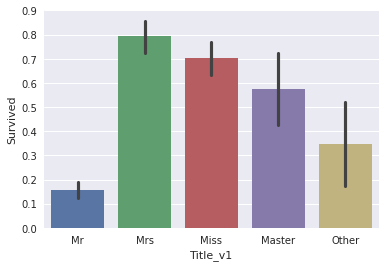

In [63]:
sns.barplot(x='Title_v1', y='Survived', data=train_test_data[0])

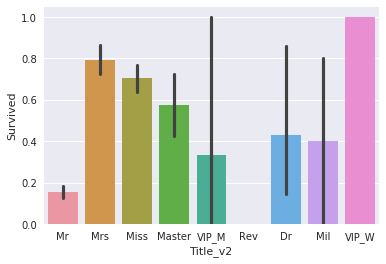

In [64]:
sns.barplot(x='Title_v2', y='Survived', data=train_test_data[0])

In [65]:
title_mapping_v1 = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
title_mapping_v2 = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "VIP_M": 5, "VIP_W":6, "Mil":7, "Dr":8, "Rev": 9}

def title_to_int(train_test_data, title_mapping, col_name):
    for dataset in train_test_data:
        dataset[col_name] = dataset[col_name].map(title_mapping)
        dataset[col_name] = dataset[col_name].fillna(0)
        dataset[col_name] = dataset[col_name].astype(int)

print('Before')
print('V1')
print(train_test_data[0]['Title_v1'].unique())
print('V2')
print(train_test_data[0]['Title_v2'].unique())
title_to_int(train_test_data, title_mapping_v1, 'Title_v1')
title_to_int(train_test_data, title_mapping_v2, 'Title_v2')
print('After')
print('V1')
print(train_test_data[0]['Title_v1'].unique())
print('V2')
print(train_test_data[0]['Title_v2'].unique())

Before
V1
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
V2
['Mr' 'Mrs' 'Miss' 'Master' 'VIP_M' 'Rev' 'Dr' 'Mil' 'VIP_W']
After
V1
[1 3 2 4 5]
V2
[1 3 2 4 5 9 8 7 6]


In [66]:
# Changing sex value to numerical values
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    

### Embarked

In [67]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [69]:
for dataset in train_test_data:
    dataset['Embarked'].fillna('S', inplace=True)

In [70]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [71]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_v1,Title_v2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,1,1


### Age Band

In [72]:
#Age
def prepare_age_v1(train_test_data):
    for dataset in train_test_data:
        dataset['Age_v1'] = dataset['Age'].copy()
        age_avg = dataset['Age_v1'].mean()
        age_std = dataset['Age_v1'].std()
        age_null_count = dataset['Age_v1'].isnull().sum()
    
        age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
        dataset['Age_v1'][np.isnan(dataset['Age_v1'])] = age_null_random_list
        dataset['Age_v1'] = dataset['Age_v1'].astype(int)
    
    for dataset in train_test_data:
        dataset.loc[ dataset['Age_v1'] <= 16, 'Age_v1'] = 0
        dataset.loc[(dataset['Age_v1'] > 16) & (dataset['Age_v1'] <= 32), 'Age_v1'] = 1
        dataset.loc[(dataset['Age_v1'] > 32) & (dataset['Age_v1'] <= 48), 'Age_v1'] = 2
        dataset.loc[(dataset['Age_v1'] > 48) & (dataset['Age_v1'] <= 64), 'Age_v1'] = 3
        dataset.loc[ dataset['Age_v1'] > 64, 'Age_v1'] = 4

def prepare_age_v2(train_test_data):
    for dataset in train_test_data:
        dataset['Age_v2'] = dataset['Age'].copy()
        age_avg = dataset['Age_v2'].mean()
        age_std = dataset['Age_v2'].std()
        age_null_count = dataset['Age_v2'].isnull().sum()
    
        age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
        dataset['Age_v2'][np.isnan(dataset['Age_v2'])] = age_null_random_list
        dataset['Age_v2'] = dataset['Age_v2'].astype(int)
    

    for dataset in train_test_data:
        dataset.loc[dataset['Age_v2'] <= 5, 'Age_v2'] = 0
        dataset.loc[(dataset['Age_v2'] > 5) & (dataset['Age_v2'] <= 10), 'Age_v2'] = 1
        dataset.loc[(dataset['Age_v2'] > 10) & (dataset['Age_v2'] <= 16), 'Age_v2'] = 2
        dataset.loc[(dataset['Age_v2'] > 16) & (dataset['Age_v2'] <= 32), 'Age_v2'] = 3
        dataset.loc[(dataset['Age_v2'] > 32) & (dataset['Age_v2'] <= 48), 'Age_v2'] = 4
        dataset.loc[(dataset['Age_v2'] > 48) & (dataset['Age_v2'] <= 64), 'Age_v2'] = 5
        dataset.loc[(dataset['Age_v2'] > 64) & (dataset['Age_v2'] <= 70), 'Age_v2'] = 6
        dataset.loc[(dataset['Age_v2'] > 70) & (dataset['Age_v2'] <= 75), 'Age_v2'] = 7
        dataset.loc[ dataset['Age_v2'] > 75, 'Age_v2'] = 8

prepare_age_v1(train_test_data)
prepare_age_v2(train_test_data)

/home/danka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/danka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_v1,Title_v2,Age_v1,Age_v2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,1,1,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,3,3,2,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,2,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,3,3,2,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,1,1,2,4


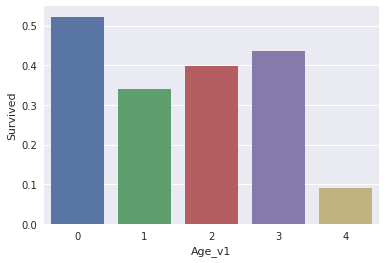

In [74]:
sns.barplot(x='Age_v1', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

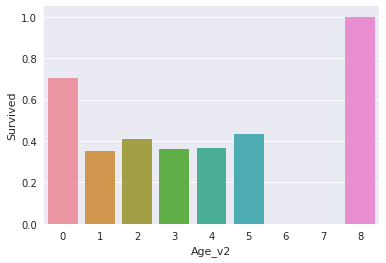

In [75]:
sns.barplot(x='Age_v2', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

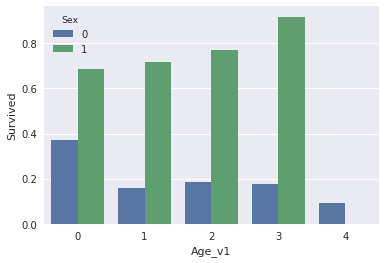

In [76]:
sns.barplot(x='Age_v1', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

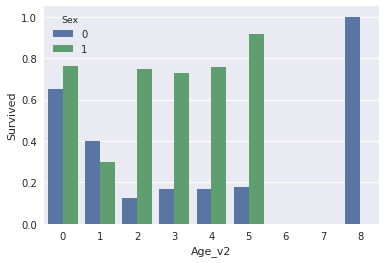

In [77]:
sns.barplot(x='Age_v2', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

From the graphs above:
- children has higher survival rate than adults
- women has high survival rate regardless of the age
- adult men has low survival rate

### Fare features

In [78]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [79]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


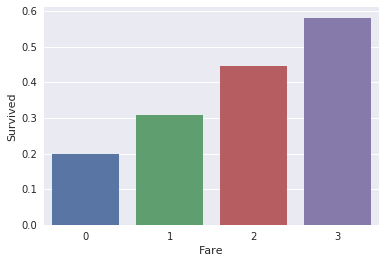

In [81]:
sns.barplot(x='Fare', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error ba

### Family Size

In [82]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train_test_data[0][['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


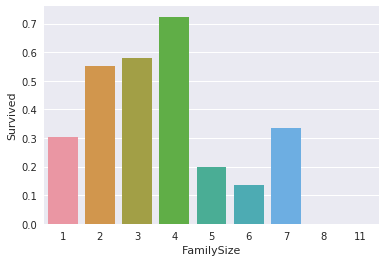

In [83]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

Clearly, there is a relationship between the family members on board and survival of the person. Those travelling alone had lower chance of survival then those travelling in a group (see below IsAlone variable). However, for bug families (5 family members and higher) the survival rates is lower than for small families (2-4), and even for people travelling alone.

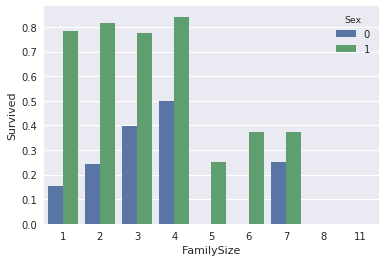

In [84]:
sns.barplot(x='FamilySize', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [85]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_test_data[0][['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


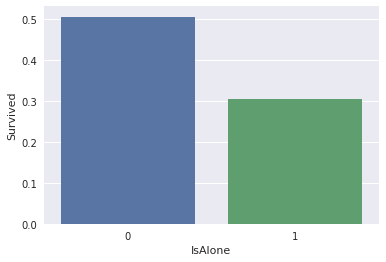

In [86]:
sns.barplot(x='IsAlone', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

Since survival rate for people alone and those with big families is lower, the family size feature was bucketed into 3 family buckets:
- for people travelling without family
- for people travelling with small family (2-4)
- for people travelling with big family ( > 4)

In [87]:
def prepare_family_size_buckets(train_test_data):
    for dataset in train_test_data:
        dataset['FamilyBucket'] = 0
        dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 4), 'FamilyBucket'] = 1
        dataset.loc[(dataset['FamilySize'] > 4), 'FamilyBucket'] = 2
prepare_family_size_buckets(train_test_data)

In [88]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_v1,Title_v2,Age_v1,Age_v2,FamilySize,IsAlone,FamilyBucket
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,NaN,0,Mr,1,1,1,3,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,1,Mrs,3,3,2,4,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,NaN,0,Miss,2,2,1,3,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,0,Mrs,3,3,2,4,2,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,NaN,0,Mr,1,1,2,4,1,1,0


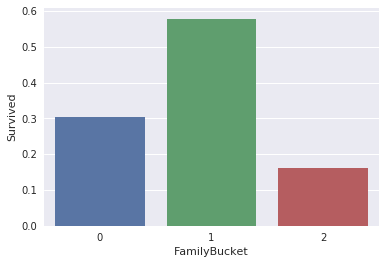

In [89]:
sns.barplot(x='FamilyBucket', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

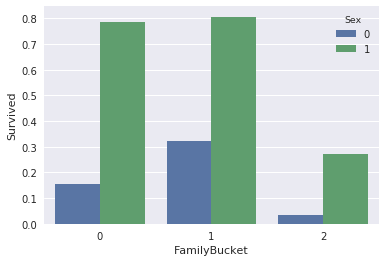

In [90]:
sns.barplot(x='FamilyBucket', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

<h3>Ticket number explorations</h3>

In [91]:
train_test_data[0].Ticket.nunique()

681

As the number of unique ticket numbers is lower than the number of passengers, the hypothesis is that people travelling together will have the same ticket number. The chance is that family members will have the same ticket number. Also, this feature is potentially stronger, as it may reveal other relationships between passengers, not covered by family bonds.

Unfortunately, due to time constraints, this feature was fully understood and was not included into model training.

In [92]:
train_tickets = train_test_data[0][["Ticket", "PassengerId"]]
test_tickets = train_test_data[1][["Ticket", "PassengerId"]]
tickets = pd.concat([train_tickets, test_tickets])

In [93]:
ppl_per_ticket = tickets.groupby(train_test_data[0].Ticket)[["PassengerId"]].count()

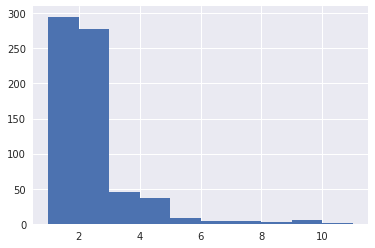

In [94]:
ppl_per_ticket.PassengerId.hist()

In [95]:
for dataset in train_test_data:
    dataset["TicketShared"] = dataset["Ticket"].map(ppl_per_ticket["PassengerId"])

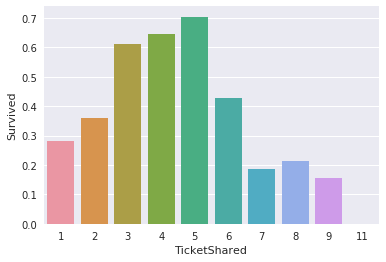

In [96]:
sns.barplot(x='TicketShared', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

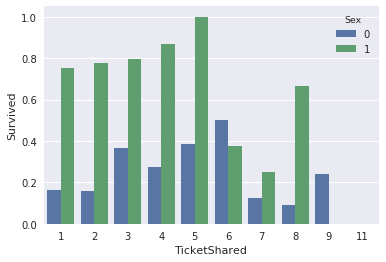

In [97]:
sns.barplot(x='TicketShared', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [98]:
for dataset in train_test_data:
    dataset['TicketBucket'] = 0
    dataset.loc[(dataset['TicketShared'] > 2) & (dataset['TicketShared'] <= 6), 'TicketBucket'] = 1
    dataset.loc[(dataset['TicketShared'] > 6), 'TicketBucket'] = 2

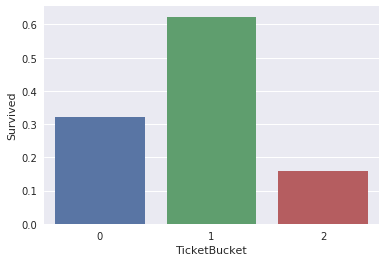

In [99]:
sns.barplot(x='TicketBucket', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

### Cabin

Hypothesis: More descriptive than class as doing research about the ship learned first letter indicates the level of the ship. Multiple levels mapped to a specific class. Also as the letters increment it reflects how far down below the top level you where. Note: lifeboats on the top level As noted earlier this is the field with the biggest number of missing data. Hypothesis is still valuable information to provide more prediction than just class.

In [100]:
for dataset in train_test_data:
    dataset['Cabin'].fillna('X', inplace=True)
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    dataset['Cabin'] = dataset['Cabin'].map( {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'X': 8} ).astype(int)

In [101]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Title_v1,Title_v2,Age_v1,Age_v2,FamilySize,IsAlone,FamilyBucket,TicketShared,TicketBucket
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,...,Mr,1,1,1,3,2,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,...,Mrs,3,3,2,4,2,0,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,...,Miss,2,2,1,3,1,1,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,...,Mrs,3,3,2,4,2,0,1,4,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,...,Mr,1,1,2,4,1,1,0,2,0


In [102]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_v1',
       'Title_v2', 'Age_v1', 'Age_v2', 'FamilySize', 'IsAlone', 'FamilyBucket',
       'TicketShared', 'TicketBucket'],
      dtype='object')

In [103]:
train_test_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int64
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null int64
Cabin           891 non-null int64
Embarked        891 non-null int64
Title           891 non-null object
Title_v1        891 non-null int64
Title_v2        891 non-null int64
Age_v1          891 non-null int64
Age_v2          891 non-null int64
FamilySize      891 non-null int64
IsAlone         891 non-null int64
FamilyBucket    891 non-null int64
TicketShared    891 non-null int64
TicketBucket    891 non-null int64
dtypes: float64(1), int64(18), object(3)
memory usage: 153.2+ KB


# Trying different ML methods:

This section does not cover the code for all approaches testes. This is because sometimes it was easier to change the script slightly and rerun the experiments, instead of copy - pasting or writing a proper function. It will mainly discuss how the particular results that were obtained.

This doc is a cleaned up version of those githubs:
- https://github.com/guillaumethomas/kaggle_titanic
- https://github.com/vulpecula/kaggle_titanic

<h3> Baseline features </h3>
Features from tutorial to compare against.

In [104]:
tutorial_features = ['Pclass', 'Sex', 'Age_v1', 'Fare', 'Embarked', 'Title_v1', 'IsAlone']

X_train = train_test_data[0][tutorial_features]
y_train = train_test_data[0]['Survived']

X_test = train_test_data[1][tutorial_features]

result_dict = {}

X_train.shape, y_train.shape, X_test.shape


((891, 7), (891,), (418, 7))

In [105]:
# A qick method to try different models. The corss validation is used to calculate expected model score.
def train_baseline_models(X_train, y_train):
    classifiers = {
        'Logistic regression': LogisticRegression(solver="liblinear"),
        'Naive Bayes': GaussianNB(),
        'Support Vector Machines': SVC(gamma="auto"),
        'Linear SVC': LinearSVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random forest': RandomForestClassifier(n_estimators=100),
        'Stochastic Gradient Descent': SGDClassifier(max_iter=5, tol=None),
        'Perceptron': Perceptron(max_iter=5, tol=None)
    }
    scores = {}
    predictions = {}
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        if len(X_train.columns) == len(X_test.columns):
            pred = clf.predict(X_test)
            predictions[clf_name] = pred
        scores[clf_name] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores, predictions

# Optimize the number of neighbours in kNN algorithm.
def train_knn(X_train, y_train):
    scores = {}
    for k in [1, 3, 5, 7, 9, 11, 13]:
        clf = KNeighborsClassifier(n_neighbors = k)
        scores[k] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

# Optimize minimum number of samples that can be used to split the node.
def train_decision_tree(X_train, y_train):
    scores = {}
    X_train_standarized = (X_train - X_train.mean()) / X_train.std()
    for min_sample_leaf in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = DecisionTreeClassifier(min_samples_leaf=min_sample_leaf)
        scores[min_sample_leaf] = np.mean(cross_val_score(clf, X_train_standarized, y_train, cv=5))
    return scores

# Optmize maximum tree depth.
def train_decision_tree_max_depth(X_train, y_train):
    scores = {}
    for max_depth in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = DecisionTreeClassifier(max_depth=max_depth)
        scores[max_depth] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

# Optimize max_depth (the maximum depth of the tree) parameter and min_samples_leaf parameters 
# (the tree node will not be further split if the number of elements is less or equal then min_samples_leaf). 
# qThis is to prevent the decision tree from overtraining.
def train_descision_tree_combo(X_train, y_train):
    scores = {}
    for max_depth in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        scores[max_depth] = {}
        for min_sample_leaf in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf)
            scores[max_depth][min_sample_leaf] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def get_dataset(train, test):
    return [train.copy(), test.copy()]

In [106]:
scores, pred = train_baseline_models(X_train, y_train)

In [107]:
scores

{'Logistic regression': 0.7934376958259615,
 'Naive Bayes': 0.7688693153064399,
 'Support Vector Machines': 0.8170273499381336,
 'Linear SVC': 0.7956724036248127,
 'Decision Tree': 0.7992133803014199,
 'Random forest': 0.8036700999047092,
 'Stochastic Gradient Descent': 0.6802499976062022,
 'Perceptron': 0.6804441612079211}

Models with best accuracy (cross-validation) scores:
- logistic regression
- SVM
- decision tree
- random forest

To solve the Titanic challange, logistic regression and decision tree models were primarly considered.
- Logistic regression - because it is relatively simple model with high interpretability
- decision tree - because it gave a good results on train set (as indicated in the original notebook)

In [108]:
pred

{'Logistic regression': array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0

In [109]:
knn_scores = train_knn(X_train, y_train)

In [110]:
knn_scores

{1: 0.7363916849038599,
 3: 0.7902495826812451,
 5: 0.7891826935864305,
 7: 0.7969536351504564,
 9: 0.7879961855274884,
 11: 0.798089784795802,
 13: 0.8115101601645799}

In [111]:
train_descision_tree_combo(X_train, y_train)

{3: {3: 0.8125771201867377,
  5: 0.8125771201867377,
  7: 0.8125771201867377,
  9: 0.8125771201867377,
  11: 0.8125771201867377,
  13: 0.8125771201867377,
  15: 0.8125771201867377,
  17: 0.8091872896782629,
  19: 0.8069463757368908},
 5: {3: 0.7912850154993976,
  5: 0.7946558729435946,
  7: 0.7935449025050474,
  9: 0.7946748460078723,
  11: 0.7879583812536195,
  13: 0.7879647292508264,
  15: 0.7890883247564443,
  17: 0.7856984942479698,
  19: 0.7879268540496145},
 7: {3: 0.7991628800331373,
  5: 0.7924148880748794,
  7: 0.7879771415358678,
  9: 0.7879646583234832,
  11: 0.7924402091363639,
  13: 0.7879647292508264,
  15: 0.7890883247564443,
  17: 0.7856984942479698,
  19: 0.7879268540496145},
 9: {3: 0.8059109429187382,
  5: 0.7935511086475681,
  7: 0.7879771415358678,
  9: 0.7879646583234832,
  11: 0.7924402091363639,
  13: 0.7879647292508264,
  15: 0.7890883247564443,
  17: 0.7856984942479698,
  19: 0.7879268540496145},
 11: {3: 0.8058983178516677,
  5: 0.7935511086475681,
  7: 0.787

Based on the above results, it is worth noticing, that:
- the lower the maximum depth of the tree is, the better higher accuracy.
- for models with relatively high max depth, the models that limit the min_sample_leaf perform better. 
That is a strong signal that decision tree will overfit easily for those data, if not pruned.

In [112]:
# Just to prove the above, experiments for the maximum depth only:
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8125771201867377,
 5: 0.7935639464966681,
 7: 0.798089784795802,
 9: 0.7980646055890037,
 11: 0.7992260053684905,
 13: 0.7969535642231133,
 15: 0.7935953318459869,
 17: 0.7936079569130576,
 19: 0.7958614959215005}

## Kaggle submission #1

In [114]:
feature_set = ['Pclass', 'Sex', 'Age_v2', 'Fare', 'Embarked', 'Title_v2', 'IsAlone']
X_train = train_test_data[0][feature_set]
y_train = train_test_data[0]['Survived']

clf = DecisionTreeClassifier()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.72222222 0.83333333 0.76404494 0.83146067 0.85393258 0.82022472
 0.84269663 0.76404494 0.84269663 0.84090909]


0.8115565770060152

In [115]:
Kaggle result: 0.77990

SyntaxError: invalid syntax (<ipython-input-115-19b53cd9a877>, line 1)

## Naive Bayes - trying simple model

There is relatively small amount of training data, so there is a risk that complex models will overfit to data. One of the simple model to be trained is naive bayes. Naive bayes assumes that the features are independent. To train a simple naive Bayes model, the set of independent features for which naive bayes performs the best was determined empirically.

In [116]:
simple_feature_set_v1 = ['Pclass', 'Sex', 'IsAlone', 'Title_v1']
X_train = train_test_data[0][simple_feature_set_v1]
y_train = train_test_data[0]['Survived']

clf = GaussianNB()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.76666667 0.78888889 0.73033708 0.85393258 0.78651685 0.78651685
 0.7752809  0.76404494 0.82022472 0.75      ]


0.7822409488139825

It was empirically observed that:

1. using Cabin instead of Pclass does not provide better results,
2. Age_v1 has been added to the set, without visible improvements, possibly because that Title_v1 may depend on the age of the person (Master for young men), so the features are not independent,
3. if any of the features is removed from the set, the algorithm performance will decrease significantly.


## Kaggle submission #2

Other simple model, logistic regression, was trained on the feature set determined by NB algorithm.

In [117]:
clf = LogisticRegression()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.8        0.76666667 0.75280899 0.84269663 0.78651685 0.78651685
 0.76404494 0.76404494 0.78651685 0.73863636]


0.778844909771876

The results were compared with two other algorithms: kNN and decision tree.

In [118]:
# kNN
train_knn(X_train, y_train)

{1: 0.7409488376249697,
 3: 0.7421419773904909,
 5: 0.7533088846781689,
 7: 0.8103234393236086,
 9: 0.8058227802312729,
 11: 0.8058480303654141,
 13: 0.7991125925468838}

In [119]:
# Decision tree
train_descision_tree_combo(X_train, y_train)

{3: {3: 0.8137006447650122,
  5: 0.8137006447650122,
  7: 0.8137006447650122,
  9: 0.8137006447650122,
  11: 0.8137006447650122,
  13: 0.8137006447650122,
  15: 0.8125770492593943,
  17: 0.8091872187509198,
  19: 0.8091872187509198},
 5: {3: 0.8069527237340977,
  5: 0.8047180868625894,
  7: 0.8080826672369223,
  9: 0.8080826672369223,
  11: 0.8080826672369223,
  13: 0.8080826672369223,
  15: 0.8069590717313044,
  17: 0.8035692412228299,
  19: 0.8035692412228299},
 7: {3: 0.8058354052983434,
  5: 0.8047180868625894,
  7: 0.8080826672369223,
  9: 0.8080826672369223,
  11: 0.8080826672369223,
  13: 0.8080826672369223,
  15: 0.8069590717313044,
  17: 0.8035692412228299,
  19: 0.8035692412228299},
 9: {3: 0.8058354052983434,
  5: 0.8047180868625894,
  7: 0.8080826672369223,
  9: 0.8080826672369223,
  11: 0.8080826672369223,
  13: 0.8080826672369223,
  15: 0.8069590717313044,
  17: 0.8035692412228299,
  19: 0.8035692412228299},
 11: {3: 0.8058354052983434,
  5: 0.8047180868625894,
  7: 0.808

For a first submission the logistic regression model was used. 
The Kaggle results were: 0.78468

## Dummy variables

As categorical feature like Title_v1, Title_v2 or Cabin are not the best one to train logistic regression (they are categorical, with no order assumed), dummy variables were created for all categorical features.

This section does not cover the full feature explorations. It describes the winning models only

In [120]:
for dataset in train_test_data:
    for title in train_test_data[0].Title_v2.unique():
        feature_name = "Title_v2_%s" % title
        print(feature_name)
        dataset[feature_name] = 0
        dataset.loc[dataset['Title_v2'] == title, feature_name] = 1

Title_v2_1
Title_v2_3
Title_v2_2
Title_v2_4
Title_v2_5
Title_v2_9
Title_v2_8
Title_v2_7
Title_v2_6
Title_v2_1
Title_v2_3
Title_v2_2
Title_v2_4
Title_v2_5
Title_v2_9
Title_v2_8
Title_v2_7
Title_v2_6


In [121]:
for dataset in train_test_data:
    for title in train_test_data[0].Title_v1.unique():
        feature_name = "Title_v1_%s" % title
        print(feature_name)
        dataset[feature_name] = 0
        dataset.loc[dataset['Title_v1'] == title, feature_name] = 1

Title_v1_1
Title_v1_3
Title_v1_2
Title_v1_4
Title_v1_5
Title_v1_1
Title_v1_3
Title_v1_2
Title_v1_4
Title_v1_5


In [122]:
for dataset in train_test_data:
    dataset['S'] = 0
    dataset.loc[dataset['Embarked'] == 0, 'S'] = 1
    dataset['C'] = 0
    dataset.loc[dataset['Embarked'] == 1, 'C'] = 1
    dataset['Q'] = 0
    dataset.loc[dataset['Embarked'] == 2, 'Q'] = 1

In [123]:
for dataset in train_test_data:
    dataset['SmallFamily'] = 0
    dataset['LargeFamily'] = 0
    dataset.loc[dataset['FamilyBucket'] == 1, 'SmallFamily'] = 1
    dataset.loc[dataset['FamilyBucket'] == 2, 'LargeFamily'] = 1

In [124]:
for dataset in train_test_data:
    for c in dataset.Cabin.unique():
        feature_name = "Cabin%s" % c
        print(feature_name)
        dataset[feature_name] = 0
        dataset.loc[dataset['Cabin'] == c, feature_name] = 1

Cabin8
Cabin2
Cabin4
Cabin6
Cabin3
Cabin0
Cabin1
Cabin5
Cabin7
Cabin8
Cabin1
Cabin4
Cabin0
Cabin2
Cabin3
Cabin5
Cabin6


In [125]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_v1',
       'Title_v2', 'Age_v1', 'Age_v2', 'FamilySize', 'IsAlone', 'FamilyBucket',
       'TicketShared', 'TicketBucket', 'Title_v2_1', 'Title_v2_3',
       'Title_v2_2', 'Title_v2_4', 'Title_v2_5', 'Title_v2_9', 'Title_v2_8',
       'Title_v2_7', 'Title_v2_6', 'Title_v1_1', 'Title_v1_3', 'Title_v1_2',
       'Title_v1_4', 'Title_v1_5', 'S', 'C', 'Q', 'SmallFamily', 'LargeFamily',
       'Cabin8', 'Cabin2', 'Cabin4', 'Cabin6', 'Cabin3', 'Cabin0', 'Cabin1',
       'Cabin5', 'Cabin7'],
      dtype='object')

## Kaggle submission #3

In [126]:
columns_used_sub_3 = ['Pclass', 'Sex', 'Age_v1', 'IsAlone', 'SmallFamily', 'LargeFamily', 
                'Title_v2_1', 'Title_v2_2', 'Title_v2_3', 'Title_v2_4', 
                'Title_v2_5', 'Title_v2_6', 'Title_v2_7', 'Title_v2_8', 'Title_v2_9']

In [127]:
X_train = train_test_data[0][columns_used_sub_3]
y_train = train_test_data[0]['Survived']

In [128]:
X_train.head()

,Pclass,Sex,Age_v1,IsAlone,SmallFamily,LargeFamily,Title_v2_1,Title_v2_2,Title_v2_3,Title_v2_4,Title_v2_5,Title_v2_6,Title_v2_7,Title_v2_8,Title_v2_9
0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,1,2,0,1,0,0,0,1,0,0,0,0,0,0
2,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0
3,1,1,2,0,1,0,0,0,1,0,0,0,0,0,0
4,3,0,2,1,0,0,1,0,0,0,0,0,0,0,0


In [129]:
clf = LogisticRegression()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.82222222 0.86666667 0.7752809  0.87640449 0.83146067 0.79775281
 0.82022472 0.78651685 0.85393258 0.84090909]


0.8271371013505846

The Kaggle test score was: 0.78947

## Kaggle submission #4 and #5
Decision trees.

NOTE: Decision tree models are rather unstable (the bigger the tree is). I have selected the model parameters used for submission based on the results I had at the time of the initial run of the notebook. Since those results are merged from other notebooks, the results differ. The parameters selected are still one of the best ones.

In [130]:
columns_used_sub_4 = ['Pclass', 'Cabin0', 'Cabin1', 'Cabin2', 'Cabin3', 'Cabin4', 'Cabin5', 'Cabin6',
                      'Cabin7', 'Cabin8','Sex', 'Age_v1', 'Fare', 'IsAlone', 'S', 'C', 'Q', 'Title_v1_1',
                      'Title_v1_3', 'Title_v1_2', 'Title_v1_4', 'Title_v1_5']

In [131]:
X_train = train_test_data[0][columns_used_sub_4]
y_train = train_test_data[0]['Survived']

In [132]:
train_decision_tree(X_train, y_train)

{3: 0.805923638913152,
 5: 0.7958174145777678,
 7: 0.809288006505456,
 9: 0.799150467748096,
 11: 0.7913228907006096,
 13: 0.7868474108150723,
 15: 0.7857238153094542,
 17: 0.7845811758122155,
 19: 0.7890504495552324}

For the fourth submission, the model that only limited the min_samples_leaf was selected. 
The min_samples_leaf was set to 11.
The Kaggle test score was: 0.78947

Below are other models compared. As decision tree model is rather unstable, this time the notbook was run the results differ slightly. This time, I would probably select a different model. 

In [133]:
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8125771201867377,
 5: 0.7935449734323905,
 7: 0.7924275131419501,
 9: 0.7992258635138044,
 11: 0.7947441774857463,
 13: 0.7992322824383543,
 15: 0.8014543651701352,
 17: 0.8036890020416436,
 19: 0.800330698737174}

In [134]:
tree_combo_results = train_descision_tree_combo(X_train, y_train)

In [135]:
results_all = []
for depth, min_leafs in tree_combo_results.items():
    for leaf in min_leafs:
        results_all.append((tree_combo_results[depth][leaf], depth, leaf))
results_all.sort()
results_all

[(0.7845811758122155, 7, 17),
 (0.7845811758122155, 9, 17),
 (0.7845811758122155, 11, 17),
 (0.7845811758122155, 13, 17),
 (0.7845811758122155, 15, 17),
 (0.7845811758122155, 17, 17),
 (0.7845811758122155, 19, 17),
 (0.7857238153094542, 7, 15),
 (0.7857238153094542, 9, 15),
 (0.7857238153094542, 11, 15),
 (0.7857238153094542, 13, 15),
 (0.7857238153094542, 15, 15),
 (0.7857238153094542, 17, 15),
 (0.7857238153094542, 19, 15),
 (0.7868474108150723, 7, 13),
 (0.7868474108150723, 9, 13),
 (0.7868474108150723, 11, 13),
 (0.7868474108150723, 13, 13),
 (0.7868474108150723, 15, 13),
 (0.7868474108150723, 17, 13),
 (0.7868474108150723, 19, 13),
 (0.7879331311194782, 5, 17),
 (0.7890504495552324, 5, 19),
 (0.7890504495552324, 7, 19),
 (0.7890504495552324, 9, 19),
 (0.7890504495552324, 11, 19),
 (0.7890504495552324, 13, 19),
 (0.7890504495552324, 15, 19),
 (0.7890504495552324, 17, 19),
 (0.7890504495552324, 19, 19),
 (0.7890757706167169, 5, 15),
 (0.7901930181251279, 5, 11),
 (0.7901993661223348

In [136]:
columns_used_sub_5 = ['Pclass', 'Sex', 'Age_v1', 'Fare', 'FamilyBucket', 'IsAlone', 
                      'S', 'C', 'Q', 'SmallFamily', 'LargeFamily', 'Title_v2_1', 'Title_v2_3', 'Title_v2_2',
                      'Title_v2_4', 'Title_v2_5', 'Title_v2_9', 'Title_v2_8', 'Title_v2_7', 'Title_v2_6', 
                      'Cabin8', 'Cabin2', 'Cabin4', 'Cabin6', 'Cabin3', 'Cabin0', 'Cabin1', 'Cabin5', 'Cabin7']

In [137]:
X_train = train_test_data[0][columns_used_sub_5]
y_train = train_test_data[0]['Survived']

In [138]:
train_decision_tree(X_train, y_train)

{3: 0.8160486944581276,
 5: 0.8093449256982886,
 7: 0.825062992346585,
 9: 0.8272472708044969,
 11: 0.8194322478967383,
 13: 0.8093071214244196,
 15: 0.8082086341982568,
 17: 0.8093322297038748,
 19: 0.8059551661171571}

In [139]:
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8204550556478203,
 5: 0.809256621156137,
 7: 0.8250376712851006,
 9: 0.8093322297038748,
 11: 0.8104369939999014,
 13: 0.8126717017987529,
 15: 0.8126843268658235,
 17: 0.812665353801546,
 19: 0.8126717017987529}

For 5th submission the decision tree trained with the max depth = 7 was selected.
Kaggle test results: 0.77990

In [140]:
tree_combo_results = train_descision_tree_combo(X_train, y_train)

In [141]:
results_all = []
for depth, min_leafs in tree_combo_results.items():
    for leaf in min_leafs:
        results_all.append((tree_combo_results[depth][leaf], depth, leaf))
results_all.sort()
results_all

[(0.7935827777062594, 5, 19),
 (0.7958362457873591, 5, 15),
 (0.796959841292977, 5, 17),
 (0.8014291150359938, 5, 13),
 (0.804837847681403, 7, 19),
 (0.804837847681403, 13, 19),
 (0.804837847681403, 15, 19),
 (0.804837847681403, 17, 19),
 (0.804837847681403, 19, 19),
 (0.8059551661171571, 9, 19),
 (0.8059551661171571, 11, 19),
 (0.8070598594858407, 5, 11),
 (0.8070850386926389, 11, 5),
 (0.8070850386926389, 17, 5),
 (0.808133025650519, 5, 3),
 (0.8082086341982568, 7, 15),
 (0.8082086341982568, 11, 15),
 (0.8082086341982568, 13, 15),
 (0.8082086341982568, 15, 15),
 (0.8082086341982568, 17, 15),
 (0.8082276072625344, 13, 5),
 (0.8082276072625344, 15, 5),
 (0.8082276072625344, 19, 5),
 (0.8093071214244196, 9, 13),
 (0.8093071214244196, 11, 13),
 (0.8093071214244196, 15, 13),
 (0.8093071214244196, 19, 13),
 (0.8093133984942835, 9, 3),
 (0.8093259526340111, 9, 15),
 (0.8093259526340111, 19, 15),
 (0.8093322297038748, 7, 17),
 (0.8093322297038748, 9, 17),
 (0.8093322297038748, 11, 17),
 (0.8

## Bonus submissions

As the model was not improved with above decision trees, simple decision tree was trained on a small subset of features. Also, to explore some other algorithm, SVM was tried.

In [142]:
simple_feature_set_v2 = ['Pclass', 'Sex', 'Age_v1', 'FamilyBucket', 'Title_v2']
X_train = train_test_data[0][simple_feature_set_v2]
y_train = train_test_data[0]['Survived']

In [143]:
clf = DecisionTreeClassifier(max_depth=3)
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.82222222 0.86666667 0.78651685 0.86516854 0.84269663 0.80898876
 0.80898876 0.78651685 0.85393258 0.84090909]


0.8282606968562025

The Kaggle score was: 0.78947

In [144]:
clf = SVC()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.82222222 0.86666667 0.78651685 0.87640449 0.83146067 0.80898876
 0.80898876 0.78651685 0.84269663 0.84090909]


0.8271371013505846

The Kaggle score was: 0.78947

In [145]:
simple_feature_set_v3 = ['Pclass', 'Sex', 'Age_v1', 'TicketBucket', 'Title_v2']
X_train = train_test_data[0][simple_feature_set_v3]
y_train = train_test_data[0]['Survived']

In [146]:
clf = SVC()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.83333333 0.85555556 0.78651685 0.87640449 0.83146067 0.80898876
 0.80898876 0.78651685 0.84269663 0.84090909]


0.8271371013505846

Kaggle result: 0.79425
The best result so far.

# Discussion of the results

Add your thoughts here.

The best result on Kaggle was:
1. SVM on feature set: 'Pclass', 'Sex', 'Age_v1', 'TicketBucket', 'Title_v2'

The second best result achieved on Kaggle was: 0.78947
It was the same for:
1. SVM on feature set: 'Pclass', 'Sex', 'Age_v1', 'FamilyBucket', 'Title_v2'
2. Decision tree with max_tree = 3, 'Pclass', 'Sex', 'Age_v1', 'FamilyBucket', 'Title_v2'
3. and logistic regression on 'Pclass', 'Sex', 'Age_v1', 'IsAlone', 'SmallFamily', 'LargeFamily', 'Title_v2_1', 'Title_v2_2', 'Title_v2_3', 'Title_v2_4', 'Title_v2_5', 'Title_v2_6', 'Title_v2_7', 'Title_v2_8', 'Title_v2_9'.
(no, it was not the same file submitted accidentally)

Since then, there was no improvement. 

Observations:
- clearly, the better results were achieved for simpler models like: logisic regression and decision tree with low max_depth, or lower number of features (SVMs)
- decision trees tend to overfit on Titanic data

Room for improvement:
- there is a chance that further investigation of Ticket variable could improve the model accuracy, as shared ticket number may reveal groups of people that travel together but are not necessarily a family
- further trying out different models, like SVM (which always gave relatively good results, but were not thoroughly considered)

What could have been done better:
- the consecutive model trials could have been better documented. 